In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from timeit import default_timer as timer

## 1-st task
Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.

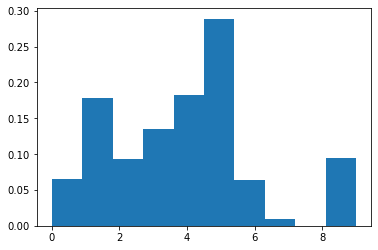

1.2609732000000804


In [3]:
def f(a,b,c):
    for i in range(len(a)):
        if (a[i]>=c):
            return(b[i])

a=np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
a=a/a.sum()
b=np.arange(10)

for i in range(len(a)):
    a[-i-1]+=a[:-i-1].sum()
    
start=timer()
for i in range(1000):
    random = np.array([f(a,b,np.random.rand()) for j in range(1000)])
end=timer()

plt.hist(random, density=True)

plt.show()

print(end-start)

---

## 2-nd task
Смоделируйте выборку размера 1000 из распределения $Exp(\lambda)$. Постройте выборочную гистограмму и точный график плотности распределения.

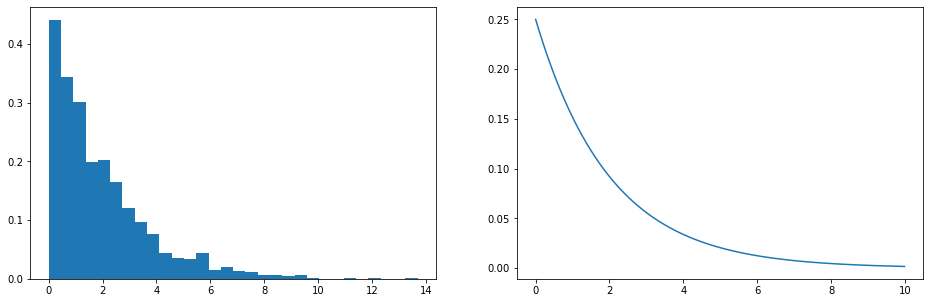

In [80]:
random_vector = np.random.rand(1000)
lamb = 0.5
random_vector = -np.log(1-random_vector)/lamb

fig, axes = plt.subplots(1, 2, figsize = (16, 5))

axes[0].hist(random_vector, density=True, bins = 30)
axes[1].plot(np.arange(1000)/100, lamb * np.exp(-np.arange(1000)*lamb/100)*lamb)

plt.show()

---

## 3-rd task
Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.


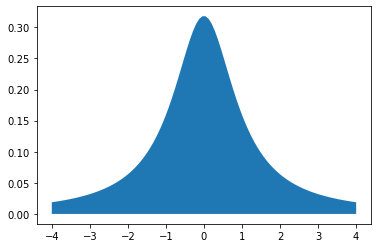

In [77]:
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.fill_between(x, 0, dist.pdf(x))

plt.show()

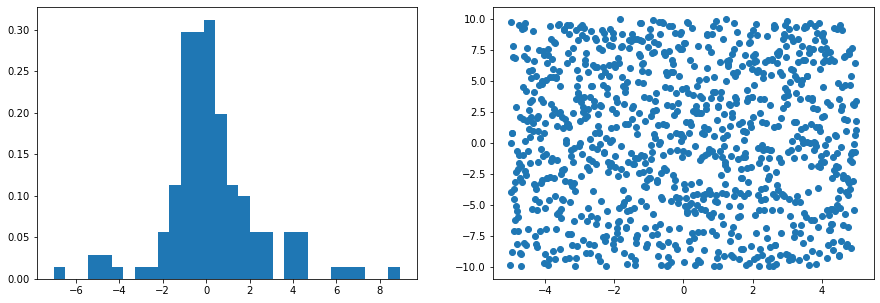

In [8]:
sample = np.array(20 * np.random.rand(1000) - 10)
sample2 = np.random.rand(1000) / 3
cauchy = sample[(lambda x: 1 / ((x ** 2 + 1) * np.pi)) (sample) >= sample2 ]

fig, axes = plt.subplots(1, 2, figsize=(15,5))

X = np.linspace(-5, 5, 1000)

axes[0].hist(cauchy, density = True, bins = 30)
axes[1].scatter(X, sample)

plt.show()


---

## 4-th task
Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

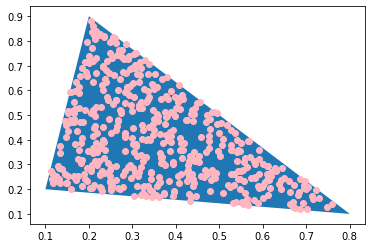

In [79]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

a = np.array([np.random.rand() for i in range(500)])
b = np.array([np.random.rand() for i in range(500)])

a1 = 1 + a + 7*b
b1 = 2 + 7*a - b

for i in range(500):
    if (b1[i]>(-4/3)*a1[i]+35/3):
        a1[i] = 1 - (a1[i] - 9)
        b1[i] = 2 - (b1[i] - 8)

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.scatter(a1/10, b1/10, color = 'lightpink')

plt.show()

---

## 5-th task
Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

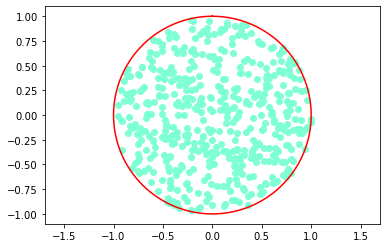

In [15]:
r=np.sqrt([np.random.rand() for i in range(500)])
alpha=np.array([np.random.rand() for i in range(500)])*2*np.pi

plt.scatter(r*np.cos(alpha),r*np.sin(alpha), c = 'aquamarine')

phi = np.linspace(0, 2 * np.pi, 1000)
plt.plot(np.sin(phi), np.cos(phi), c = 'red')

plt.axis('equal')

plt.show()

---

## 6-th Task
Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

In [ ]:
steps=np.zeros([2,101])

t = np.array([np.random.randint(0,2) for i in range(50)])

t_zer_len = len(t[t==0])*2

up_down=np.random.choice(np.arange(n),t_zer_len,replace=False)+1
up_down.sort()

up_down1=np.random.choice(new,t_zer_len//2,replace=False)
up_down1.sort()

steps[1,up_down1]=1
steps[1,up_down]=steps[1,up_down]*2-1

left_right=np.arange(n)[steps[1,1:]==0]+1
left_right1=np.random.choice(left_right,50-t_zer_len//2,replace=False)

steps[0,left_right1]=-1
steps[0,left_right]=steps[0,left_right]*2+1

for i in range(n+1):
    steps[0,-i-1]+=steps[0,:-i-1].sum()
    steps[1,-i-1]+=steps[1,:-i-1].sum()
    
plt.plot(steps[0],steps[1])
plt.axis('equal')

plt.show()

---

## 7-th Task
Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

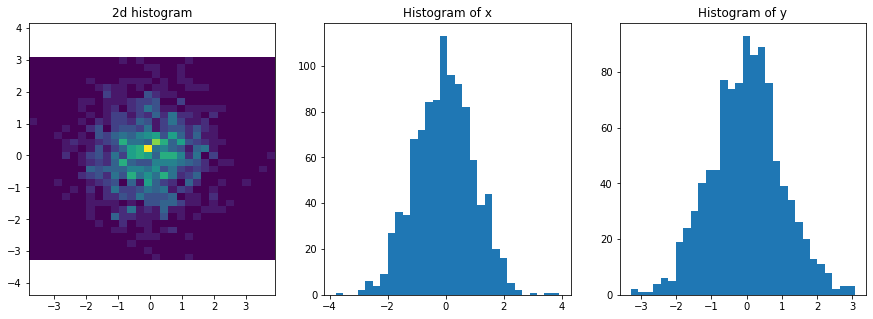

In [10]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

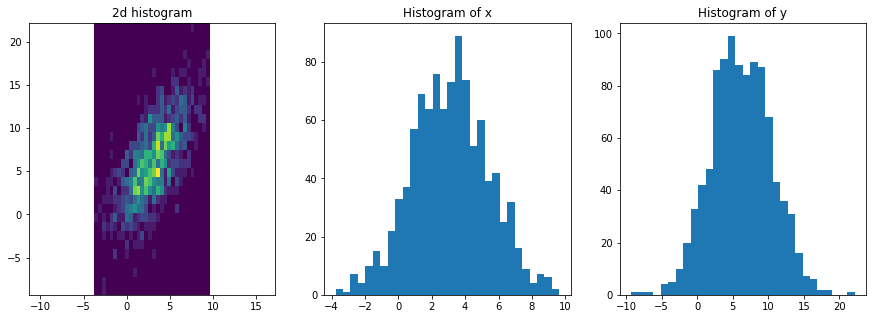

In [19]:
n = 1000
x1, x2 = np.random.rand(2, n)*2-1

for i in range(n):
    while x1[i]*x1[i]+x2[i]*x2[i]>1:
        x1[i],x2[i]=np.random.rand(2)*2-1

sq_sum=x1*x1+x2*x2

y1=x1*np.sqrt(-2*np.log(sq_sum)/sq_sum)
y2=x2*np.sqrt(-2*np.log(sq_sum)/sq_sum)

z1 = y1 * 2 + y2 +3
z2 = y1 + y2 * 4 +6

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist2d(z1, z2, bins=30)
axes[0].axis('equal')
axes[0].set_title("2d histogram")

axes[1].hist(z1, bins=30)
axes[1].set_title("Histogram of x")

axes[2].hist(z2, bins=30)
axes[2].set_title("Histogram of y")

plt.show()

---

## 8-th Task
Перейдите от вектора из независимых стандартных нормальных величин к гауссовскому вектору с нулевым средним и заданной ниже ковариационно матрицей. Обоснуйте теоретически и численно, что полученный вектор обладает требуемой ковариационной матрицей.



In [21]:
B = np.array([[ 2.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.],
              [ 0.,  4.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
              [ 0.,  0.,  4.,  0.,  0.,  0., -1.,  0.,  0.],
              [ 0., -1.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
              [-1.,  0.,  0.,  0.,  2.,  0.,  0.,  0., -1.],
              [ 0.,  0.,  0.,  0.,  0.,  4.,  0., -1.,  0.],
              [ 0.,  0., -1.,  0.,  0.,  0.,  4.,  0.,  0.],
              [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  4.,  0.],
              [-1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  2.]])

In [22]:
from scipy.linalg import sqrtm

a = np.zeros([9,10000])

for i in range(10000):
    a[:, i] = np.random.normal(0, 1, 9)
    
print((sqrtm(B).imag > 10e-5).any())

c = np.matmul(sqrtm(B).real, a)

print(abs(np.cov(c) - B) < 10e-1)

False
[[ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True]]


---

## 9-th Task
С помощью метода Монте-Карло (бросанием случайной точки в квадрат) оцените число π . Теоретически обоснуйте необходимое число бросаний, чтобы оценить число π с точностью 3 знака после запятой и достоверностью 99%. С помощью метода Монте-Карло оцените, сколько на практике требуется бросаний, чтобы достичь с требуемой достоверностью нужной точности.

Не совсем понял, с чем можно сравнивать, если пускать цикл while. Ясно, что тут требуется использовать доверительный интервал, но реализовать так и не получилось(( 

---

## 10-th Task
Реализовать метод генерации случайного разбиения n-элементного множества на подмножества. С его помощью оценить ожидаемое число подмножеств в случайном разбиении множества из 100 элементов.


In [4]:
n=100
k=1
a=np.zeros(n)

for i in range(n):
    a[i]=np.random.randint(0,k)
    if a[i]==k-1:
        k+=1
        
print(a)
print(k)

[ 0.  0.  1.  2.  1.  3.  0.  2.  3.  3.  1.  4.  1.  1.  2.  4.  1.  0.
  4.  5.  0.  4.  3.  2.  4.  4.  4.  1.  5.  3.  4.  6.  7.  2.  6.  4.
  2.  2.  1.  1.  4.  5.  4.  1.  4.  4.  3.  6.  6.  5.  5.  0.  3.  5.
  1.  8.  8.  8.  1.  2.  7.  2.  3.  8.  0.  5.  2.  9.  2.  5.  4.  2.
  7.  6.  5.  6.  0.  2.  5.  3.  4. 10.  8.  5.  6.  3. 10.  7.  6. 10.
  0.  8. 11. 10.  5.  3. 11.  3.  5.  5.]
13


Выглядит как-то просто...

In [6]:
a = 'abcd'

In [10]:
a[-2:]

'cd'

In [12]:
a*2

'abcdabcd'

In [26]:
a=''
for x in str(0):
    a+=str(int(x)**2)
print(a)

0


In [37]:
if type(25**(1/2)) == int:
    print('yes')
else:
    print('NO')
type(25**1/2)

NO


float

In [39]:
print((25**(1/2)) % 1)

0.0


In [42]:
arr = [1,2,3,4,3,2,1]
def f(arr):
    for i in range(len(arr)):
        print((arr[i+1:]),'\t',(arr[:i]),'\t',i,'\n')
f(arr)

[2, 3, 4, 3, 2, 1] 	 [] 	 0 

[3, 4, 3, 2, 1] 	 [1] 	 1 

[4, 3, 2, 1] 	 [1, 2] 	 2 

[3, 2, 1] 	 [1, 2, 3] 	 3 

[2, 1] 	 [1, 2, 3, 4] 	 4 

[1] 	 [1, 2, 3, 4, 3] 	 5 

[] 	 [1, 2, 3, 4, 3, 2] 	 6 



In [76]:
a ='Hello wrld'
b = a.split(' ')
print(b)
print(a)
print(len(b))
print(' '.join(b[i].capitalize() for i in range(len(b))))

['Hello', 'wrld']
Hello wrld
2
Hello Wrld
